# Autocorrelation Diagnostic

Autocorrelation plots show the degree a time series signal is correlated with itself.  As a diagnostic for Markov Monte Carlo Chains they provides an estimate the indepedence of each draw from previous draws in the same chain. This is important since draws from a mcmc chain that are highly correlated could indicate issues with chain convergence.

## Arviz Autocorrelation plots
By default ArviZ will generate an autocorrelation plot for each variable and for each chain. The autocorrelation should decrease as the lag increases, which indicates a low level of correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bbc4f28>,
      dtype=object)

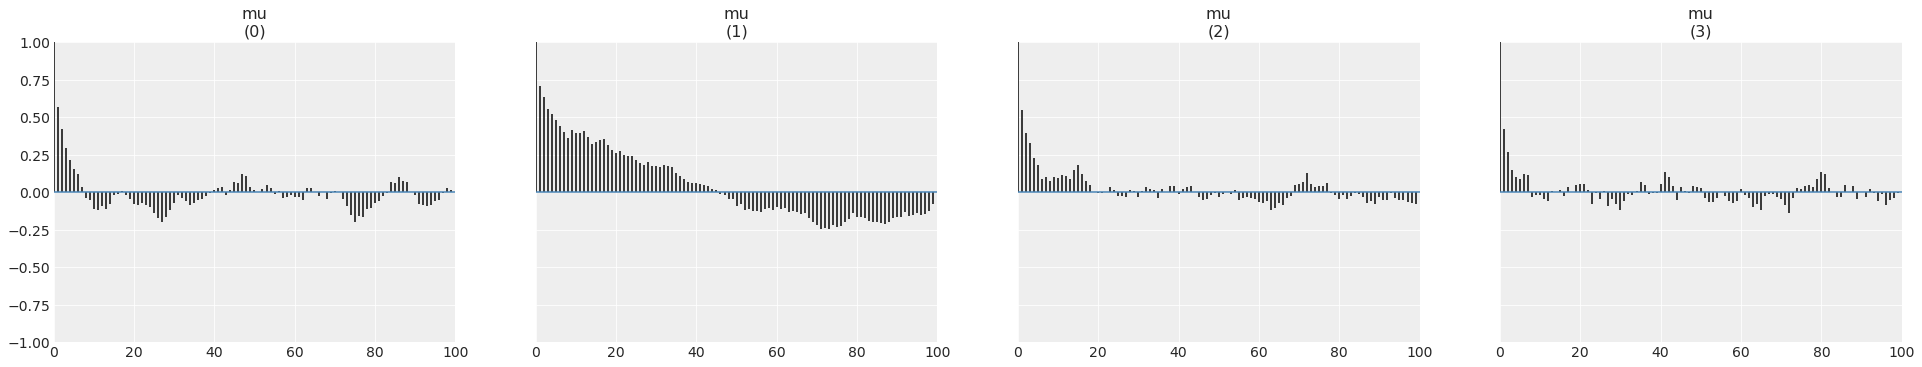

In [8]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

az.style.use('arviz-darkgrid')
data = az.load_arviz_data('centered_eight')
az.plot_autocorr(data, var_names="mu")

## Autocorrelation deriviation
Autocorrelation at each lag is defined as

$$\large \rho_{lag} = \frac{\Sigma_{i}^{N-lag} (\theta_{i} - \overline{\theta})(\theta_{i + lag} - \overline{\theta})}
{\Sigma_{i}^{N}(\theta_{i} - \overline{\theta})}$$

This formula may be recognized as a special form of Pearson's correlation coefficient, where instead of measuring the correlation between two arbitrary sets, we are instead measuring the correlation of different time slices of the same chain.

We can manually calculate the autocorrelation using numpy

In [10]:
mu_0 = data.posterior.sel(chain=0)["mu"]
lag = np.arange(0,100)
auto_corr = []

for shift in lag:
    # Or None is to handle the case of indexing at -0
    corr = np.corrcoef(mu_0[:-shift or None],mu_0[shift:])[0,1]
    auto_corr.append(corr)
    
auto_corr[:5]

[1.0,
 0.5678988350930042,
 0.42329055833861234,
 0.2946733022467791,
 0.21681918780266368]

Text(0.5,0.98,'Autocorrelation of Mu Chain 0')

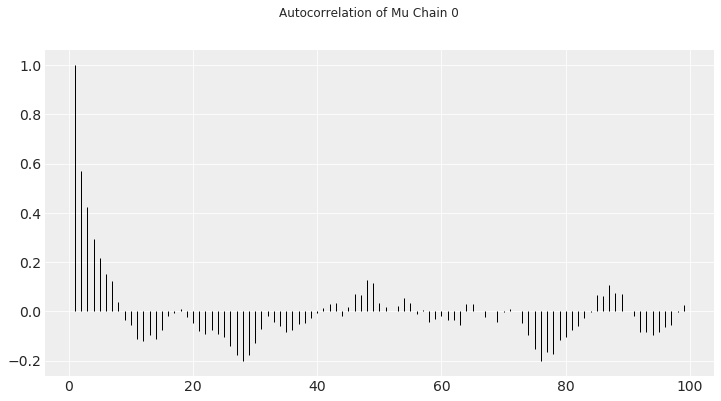

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
ax.vlines(x=np.arange(1, 100),
                  ymin=0, ymax=auto_corr,
                  lw=1)
fig.suptitle("Autocorrelation of Mu Chain 0")

Text(0.5,1,'Autocorrelation of Mu Chain 0')

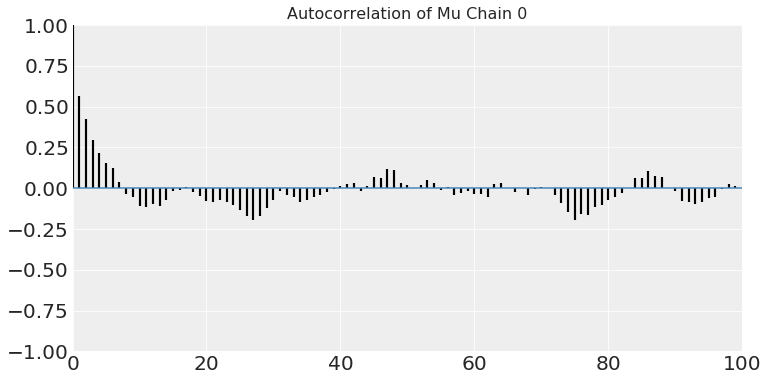

In [12]:
# Filter to just one chain
axes = az.plot_autocorr(chain_0, var_names="mu", figsize=(12,6))
axes[0][0].set_title("Autocorrelation of Mu Chain 0")

Note that this plot is identical to chain 0 for Mu in the posterior data

## Additional examples

MCMC chains with high autocorrelation can indicate that a convergence to a stationary distribution. Take the following example where we try and use pymc3 estimate the parameters of a generated distribution.

In [ ]:
import pymc3 as pm

# Generate observed distribution with fixed parameters
SD = 2
MU = -5
obs = np.random.normal(loc=MU, scale=SD, size=10000)

In [ ]:
# Attempt to use pymc3 to estimate mean of the distribution
with pm.Model() as model:
    mu = pm.Normal("mu", mu=-5000, sd=1)
    y = pm.Normal("y", mu=mu, sd=SD, observed=obs)
    step = pm.Metropolis(vars=[mu])
    trace = pm.sample(5000, step, chains=2)
az.plot_trace(trace)

From a modeling standpoint`Mu`is a free, or unknown, parameter that is being estimated by pymc3. 

## References
[How Autocorrelation Works](https://www.youtube.com/watch?v=ZjaBn93YPWo) - Brandon Rohrer  
[Traceplots and autocorrelation](https://www.coursera.org/lecture/mcmc-bayesian-statistics/trace-plots-autocorrelation-oqvff?authMode=login) - Matthew Heiner  
[Convergence Diagnostics for Markov Chain Monte Carlo](http://astrostatistics.psu.edu/RLectures/diagnosticsMCMC.pdf) - Eric B Ford  
**Add in NIST definition from yellow page**

## Questions for reviewer
* Should it be mentioned that if the autocorrelation is high then reparametrization may be needed?
* Should thinning be mentioned? Kruschke both recomends and anti recomends the pattern


http://doingbayesiandataanalysis.blogspot.com/2011/11/thinning-to-reduce-autocorrelation.html